## Undestanding why the Local Model sometime gives error <i>"Token indices sequence length is longer than the specified maximum sequence length for this model (4131 > 512). Running this sequence through the model will result in indexing errors"<i>
> **Long Story Short**: In case of Local model, the tokenizer and model is configured by user (i.e. model.config.max_position_embeddings, tokenizer.model_max_length, tokenizer.max_length etc.) which are critical hyperparmeters for model to perform well, in our case we did the same and by defualt these hyperparameters are set to 512, and this is why our model is not taking any contexts which has more token than 512.

<code>cd ~/projects/dataFiller/app
python3 enrich_data_to_file.py "L" "/home/username/projects/dataFiller/data/ycombinator_with_foundation_year.csv" 2 "Funding of" "How much funding raised by" "companies" "funding"</code>

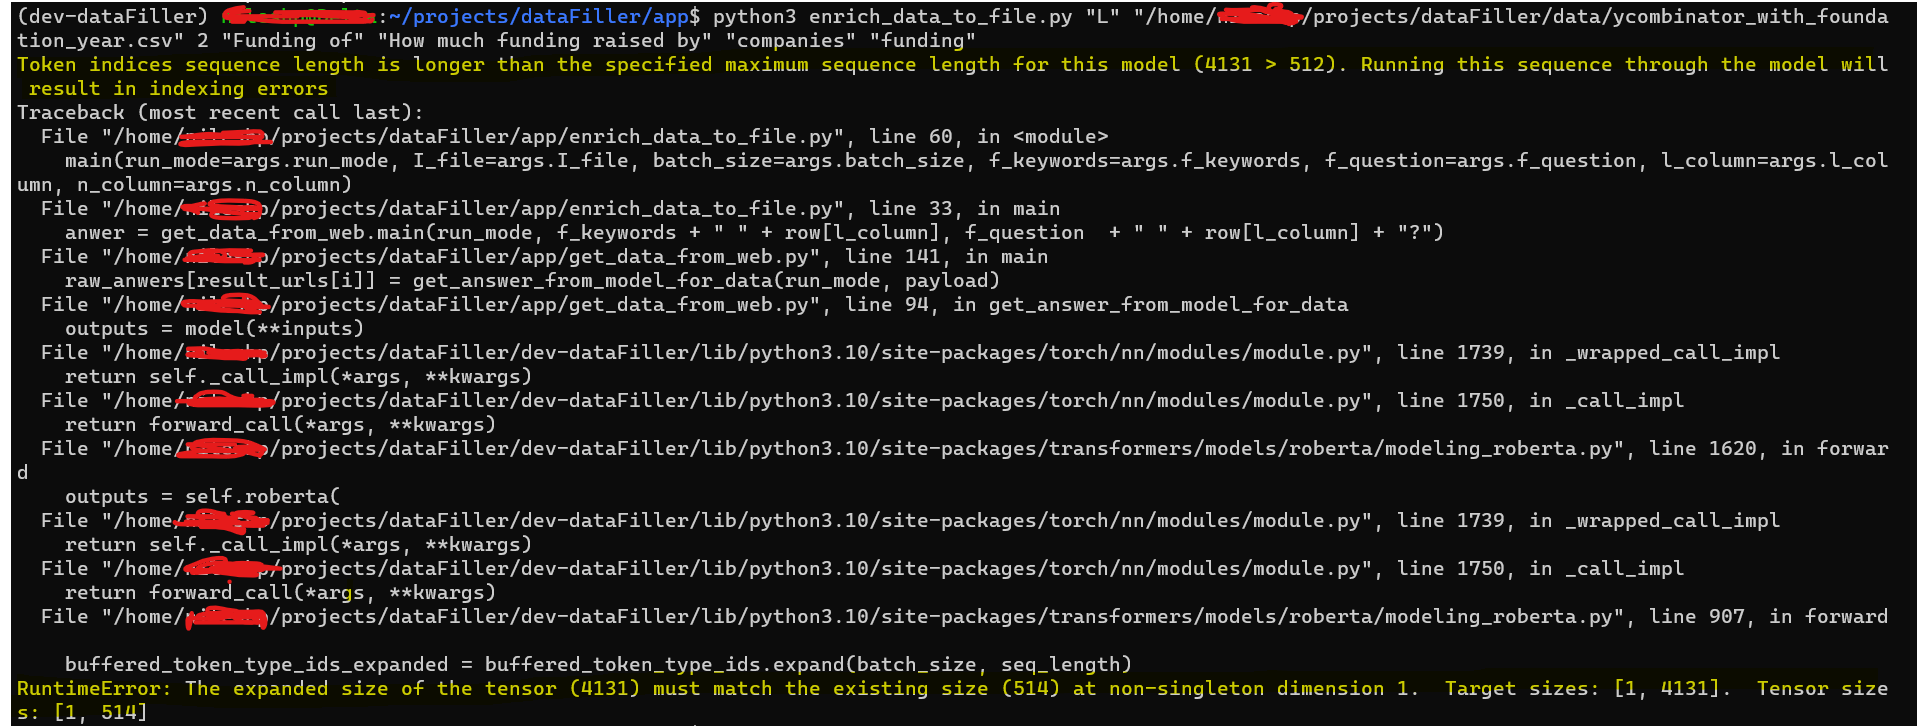

### Lets try to implement a solution which is to increase the hyperparameters value to 8192

<div class="alert alert-block alert-danger">
<b>Warning:</b> Increasing the sequence length can significantly <u>impact the model's performance and memory requirements</u>. Be sure to test the model thoroughly after updating the sequence length.
</div>

1. First cross check what are values for the default hyperparameters set.
2. Then recreate the indexing error.
3. Update the hyperparameters, save the model and use this new model with same question and context and try to get answer from it.

#### Cross check what the default hyperparameters set

In [36]:
from transformers import AutoTokenizer, RobertaForQuestionAnswering

tokenizer = AutoTokenizer.from_pretrained("deepset/roberta-base-squad2")
model = RobertaForQuestionAnswering.from_pretrained("deepset/roberta-base-squad2")

In [37]:
print(model.config.max_position_embeddings)

514


In [38]:
print(tokenizer.max_length)

AttributeError: RobertaTokenizerFast has no attribute max_length

In [39]:
print(tokenizer.model_max_length)

512


#### Recreate the indexing error

In [40]:
import torch

tokenizer = AutoTokenizer.from_pretrained("deepset/roberta-base-squad2")
model = RobertaForQuestionAnswering.from_pretrained("deepset/roberta-base-squad2")

question = "How much funding raised by Airbnb?"
context =  "When Hosts on Airbnb open their doors to travelers from around the world, they welcome their guests into their communities, too. As part of our commitment to share Airbnb’s success with our stakeholders, we want to give back to the neighborhoods and towns our Hosts call home. In 2020, Airbnb created the Airbnb Community Fund to distribute $100 million USD through 2030 to help strengthen communities around the world. Today, we are excited to announce the 2022 Airbnb Community Fund grant recipients. In 2022, the program’s primary focus was sustainability, with more than $6 million in grants awarded to over 20 organizations working to protect our planet and promote environmental sustainability and conservation in 19 countries across six continents. As in 2021, our Host Advisory Board provided important feedback to inform this process. The 2022 grant recipients include organizations around the world such as: Leave No Trace in the US, WWF-Brazil Coral Reef Restoration Project in Brazil, EcoExploratorio in Puerto Rico, Retake Roma in Italy, Lapalala Wilderness School in South Africa, The Association of National Trusts in Japan, the National Trust of Korea in Korea, and Bush Heritage in Australia. In 2022, the Airbnb Community Fund also supported sustainability education and awareness programs, as well as organizations performing home energy audits to help Airbnb Hosts across the UK and France improve the energy efficiency of their homes. The recipients were Effy and Essentiem in France, and Energy Savings Trust and The Energy Saving Trust Foundation in the UK. In addition, Airbnb also directed Community Fund grants to additional organizations that we believe play an important role in communities around the world. During 2021, the Community Fund’s inaugural year, Airbnb distributed grants to more than 150 organizations focused on COVID-19 relief, economic empowerment, and education as they worked to meet the unprecedented needs brought about by the pandemic. Many of these organizations have since shared how the funding impacted their communities over the last year. Among the impacts these organizations shared, Rescuing Leftover Cuisine, Inc. provided 410,000 meals for Americans living in food insecurity and the Irish Hospice Foundation developed bereavement education programs for frontline workers. Many of the 2022 grant recipients shared with us how this funding will impact their organizations: “As a 501 (c) 3 non-profit, EcoExploratorio relies on the generous donations from individuals and corporate donors, in-kind donations, and volunteers to help us provide exhibits and programming that sparks imagination in the fields of science, technology, engineering, and math. Thanks to the support of friends like Airbnb, EcoExploratorio has become a leader in Puerto Rico as an informal STEM Education center, funded by philanthropy partners since 2014 impacting thousands of students, teachers, and the general public annually from our current space in Plaza Las Américas.” EcoExploratorio, Puerto Rico “The Endangered Wildlife Trust is committed to conserving threatened species and ecosystems in Southern Africa to the benefit of all. To achieve this, we focus on three main strategic imperatives: Saving Species, Conserving Habitats, and Benefiting People. The EWT would like to express a heartfelt thank you to Airbnb for their incredible generosity and support. Their support will assist us in our efforts to ensure our children and our children’s children enjoy the magnificent diversity that Africa has to offer. This Airbnb Community Fund grant will go towards what the EWT does best, Conservation In Action.” Endangered Wildlife Trust, South Africa “Australia faces a biodiversity challenge with the highest extinction rate in the developed world. This generous grant funded by Airbnb, Inc. supports critical groundwork to restore Australia’s magnificent landscapes to good health, giving its irreplaceable native species an opportunity to recover and thrive. The grant will enhance the vital partnerships that Friends of the Australian Bush Heritage Fund supports with Aboriginal groups through charitable organizations working to conserve Australia’s unique biodiversity and manage land of substantial conservation value.” Friends of the Australian Bush Heritage Fund, United States on behalf of Australia “Loss and degradation of forests and wetlands is impacting the planet and threatening livelihood and welfare of Indigenous Peoples and local communities (IPLCs). At the Global Environment Centre, we believe empowering IPLCs to protect and restore ecosystems is key to addressing the global crises related to climate change and biodiversity loss. Over the past 25 years, we have supported the development and activities of nearly 50 community groups and organizations across Malaysia. The funding from Airbnb will allow us to build a national platform to bring key groups together to learn from and work with one another. We will also support targeted action with these groups at 10 different sites for forest protection and rehabilitation, outreach, conservation advocacy, and environmental education.” Global Environment Centre, Malaysia “The Global Tourism Resilience and Crisis Management Centre (GTRCMC) is honored to receive this timely grant as we undertake our vital research project that will help raise awareness among Caribbean Micro, Small and Medium Sized Tourism Entrepreneurs (MSMEs) about the importance of climate-responsible practices in their operations, as well as encouraging them to take urgent action to combat climate change. We are excited to partner with Airbnb whose climate action corporate sustainability framework (which is committed to making Airbnb a Net Zero company by 2030), is in sync with one of the GTRCMC’s mandates; that is, building tourism resilience capacities for climate action and for global sustainability.” Global Tourism Resilience Crisis Management Centre, Jamaica “The Airbnb Community Fund will support Leave No Trace’s new Spotlights Program. Leave No Trace Spotlights are community sustainability initiatives that provide volunteer service projects, hands-on trainings and outreach—all resulting in healthier parks, trails and communities. Together, Leave No Trace and Airbnb will impact more than 20 high-profile Host communities in the United States this year to protect the outdoor areas those communities rely on. This important alliance with Airbnb significantly expands our work, ensuring that even more people and places are armed with Leave No Trace education, the most effective way to preserve the outdoor places we all love.” Leave No Trace, United States “Lewa Wildlife Conservancy is honored to be the recipient of a significant grant award from the Airbnb Community Fund that will have an impact on the whole of Lewa’s model, a 360-degree approach to conservation benefiting wildlife, ecosystems, and people.  Through Lewa 360, the Conservancy will utilize Airbnb funding where it is needed most and to deliver five key programs: Conservation and Security, Healthcare, Education, Women’s Microenterprise, and Sustainable Agriculture. On behalf of the Conservancy and its local and international partners, thank you for sharing our vision of a future where people across Kenya and the world value, protect, and benefit from wildlife and healthy ecosystems.” Lewa Wildlife Conservancy, Kenya “The National Trust of Korea (NTK) is grateful to receive an Airbnb Community Fund grant in support of our efforts to help Korea’s future generations inherit and enjoy our country’s beautiful and sustainable natural heritage. With the grant, we are planning to improve the ‘Donggang Jejang Village’ with underwater purification activities using boats that would allow us to remove unseen garbage in the water. In addition, we plan to conduct a pilot project that replaces the current traditional farming method that depends on equipment made of plastic, agricultural pesticides, and chemicals with an eco-friendly farming method for local farmers.” National Trust of Korea, Korea “The Nebenan Foundation is very happy to receive the generous support from the Airbnb Community Fund and we thank you very much for your trust in our organization! We can now set up our “Klimaschutz nebenan” (Climate Protection Next Door) competition to be even larger in 2023! This means reaching out to even more neighbors, and activating more community-led climate protection initiatives all over Germany’s neighborhoods. What a great outlook for 2023! That’s encouraging!” nebenan.de Foundation, Germany “As Plastic Free we are glad to receive Airbnb funds in order to continue our meaningful projects. The funds will support our volunteers during the cleanup actions, the classes to raise awareness in schools and the rescue of sea turtles that are treated in our recovery center, which will be able to find the most suitable meals and treatments before being released back into the sea. Moreover, we will improve our work with municipalities signing more collaboration pacts for the sake of the environment and to simplify local projects supported by institutions. Additionally, we will develop our newborn projects focused on collaboration with sports associations, fight against the abandonment of cigarette butts and move the first steps towards Europe and the rest of the world.” Plastic Free Onlus, Italy “Retake and Airbnb Italy will join forces in five wonderful cities. From March to June, Retakers and Airbnb Hosts will jointly organize four clean up and speak up events in Milan, Venice, Naples and Brindisi, involving Airbnb Guests and combining culture and beauty, with the pleasure of taking care of the places where we live. Starting September, we will requalify a portion of the confluence between Tiber and Aniene rivers in Rome to contribute to the widespread museum in that area. Together, we can make a difference!” Retake Roma, Italy “Rezero seeks new solutions to extend the life of products and materials by facilitating their reuse, and to eliminate the generation of household waste. We create and share knowledge, and promote innovative ideas, legislative initiatives, public plans, and projects so that companies, public administrations, and citizens can have the opportunity to enjoy a model of production and consumption towards Zero Waste, without toxic materials or products that are left without use. The grant from Airbnb will mainly be used for responsible tourism and consumption projects, and will support Rezero’s activity as we continue working towards a Zero Waste society.” Rezero, Spain “Surfrider Foundation Canada is so grateful for this generous donation from Airbnb. These funds directly support our important work in communities across Canada to reduce plastic pollution, protect the ocean, preserve public beach access and ensure clean water so that all people can enjoy the coast.” Surfrider Foundation Canada, Canada “The Association of National Trusts in Japan is involved in land trust activities in the aim of protecting important nature from development projects by acquiring land, and preserving places where many wildlife species can live in peace. With the Airbnb Community Fund grant, we will further purchase forests and wetlands that are home to precious wildlife, raise awareness of National Trust activities, make policy recommendations to the national and local governments, and conduct research and surveys. The grant will also encourage the 30by30 initiative for biodiversity conservation, and further it will help hand over important natural capital for future generations.” The Association of National Trusts in Japan, Japan “With the Airbnb Community Fund grant, The Lapalala Wilderness School will continue the essential work we do to help our children and young adults discover the value of biodiversity in our natural world and our place within it, as well as identify and nurture Africa’s future conservation champions. Environmental Education courses are vitally important and teach children that the health of people is intimately connected with the health of the environment. The grant will assist us in setting up gardens in our local communities and also create a space to educate the public on climate change and biodiversity education as it is a core pillar of our work.” The Lapalala Wilderness School, South Africa “Tusk is incredibly grateful for the generous support from the Airbnb Community Fund. This funding will make a significant contribution to community-led conservation in Africa. Specifically, the grant will support the protection of endangered forest habitats in northwestern Madagascar through empowering local communities and sustainable livelihood activities. It will also help to fund Tusk’s flagship Pan African Conservation Education (PACE) program, which works with schools, education centers and community groups in more than 30 African countries.” Tusk, United Kingdom in support of African countries “UNESCO Waterberg Biosphere would like to thank Airbnb for aiding our critical conservation efforts and being part of this journey towards Protecting Forever, Together. This Community Fund grant will be used in scaling up our communication with our stakeholders and partners, our environmental education/awareness programmes as well as supporting food gardens in rural schools. Working together with like-minded organizations helps us ensure that more people are included, thus working towards the overarching goal of leaving no one behind if we are to make a meaningful impact.” UNESCO Waterberg Biosphere, South Africa “WWF-Brazil is excited to be part of this great effort led by the Airbnb Community Fund. These grants will help change the critical scenario for Brazilian Coral Reefs, which already suffer from climate change. Together, WWF-Brazil and Airbnb Community Fund partnership will support making oceans healthier by promoting coral reef restoration as an important agenda for climate change adaptation in the Brazilian Northeast Coast.”"
encoded_inputs = tokenizer(question, context, return_tensors="pt")
print(encoded_inputs)

Token indices sequence length is longer than the specified maximum sequence length for this model (2663 > 512). Running this sequence through the model will result in indexing errors


{'input_ids': tensor([[   0, 6179,  203,  ...,   17,   46,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]])}


In [41]:
with torch.no_grad():
    outputs = model(**encoded_inputs)
answer_start_index = outputs.start_logits.argmax()
answer_end_index = outputs.end_logits.argmax()
predict_answer_tokens = encoded_inputs.input_ids[0, answer_start_index : answer_end_index + 1]
response = {
    'answer': tokenizer.decode(predict_answer_tokens, skip_special_tokens=True),
    'score': outputs.start_logits[0, answer_start_index].item(),}
return json.dumps(response)

RuntimeError: The expanded size of the tensor (2663) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 2663].  Tensor sizes: [1, 514]

#### Change the hyperparameters and try again

In [8]:
# Update sequence length to 8192
model.config.max_position_embeddings = 8192
tokenizer.model_max_length = 8192
tokenizer.max_length = 8192
# Save updated model and tokenizer
model.save_pretrained('roberta-base-8192')
tokenizer.save_pretrained('roberta-base-8192')

('roberta-base-8192/tokenizer_config.json',
 'roberta-base-8192/special_tokens_map.json',
 'roberta-base-8192/vocab.json',
 'roberta-base-8192/merges.txt',
 'roberta-base-8192/added_tokens.json',
 'roberta-base-8192/tokenizer.json')

##### The model "roberta-base-8192" has been cached in very same directory 

>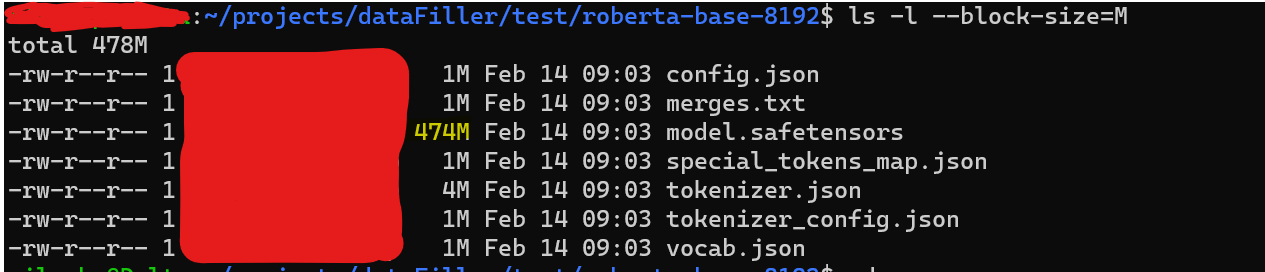

In [42]:
tokenizer = AutoTokenizer.from_pretrained("roberta-base-8192")
model = RobertaForQuestionAnswering.from_pretrained("roberta-base-8192", ignore_mismatched_sizes=True)

encoded_inputs = tokenizer(question, context, return_tensors="pt")
print(encoded_inputs)

Some weights of RobertaForQuestionAnswering were not initialized from the model checkpoint at roberta-base-8192 and are newly initialized because the shapes did not match:
- roberta.embeddings.position_embeddings.weight: found shape torch.Size([514, 768]) in the checkpoint and torch.Size([8192, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'input_ids': tensor([[   0, 6179,  203,  ...,   17,   46,    2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]])}


<div class="alert alert-block alert-info">
<b>Challenge:</b> is we might need to retrain the model since we are changing the hyperpameters
</div>

In [43]:
import json

with torch.no_grad():
    outputs = model(**encoded_inputs)
answer_start_index = outputs.start_logits.argmax()
answer_end_index = outputs.end_logits.argmax()
predict_answer_tokens = encoded_inputs.input_ids[0, answer_start_index : answer_end_index + 1]
response = {
    'answer': tokenizer.decode(predict_answer_tokens, skip_special_tokens=True),
    'score': outputs.start_logits[0, answer_start_index].item(),}
print(json.dumps(response))

{"answer": " inaugural", "score": 2.121018171310425}


In [44]:
context = """Airbnb, Inc. (/ˌɛərˌbiːɛnˈbiː/ AIR-BEE-en-BEE, an abbreviation of its original name, "Air Bed and Breakfast"[5]) is an American company operating an online marketplace for short-and-long-term homestays and experiences in various countries and regions. It acts as a broker and charges a commission from each booking. Airbnb was founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia. It is the best-known company for short-term housing rentals.[6][7] History After moving to San Francisco in October 2007, roommates and former schoolmates Brian Chesky and Joe Gebbia came up with an idea of putting an air mattress in their living room and turning it into a bed and breakfast.[8] In February 2008, Nathan Blecharczyk, Chesky's former roommate, joined as the chief technology officer and the third co-founder of the new venture, which they named "AirBed & Breakfast".[8][9] They put together a website that offered short-term living quarters and breakfast for those who were unable to book a hotel in the saturated market.[8] The site Airbedandbreakfast.com was launched on August 11, 2008.[10][11] The founders had their first customers in the summer of 2008, during the Industrial Design Conference held by Industrial Designers Society of America, where travelers had a hard time finding lodging in the city.[12] After the founders raised $30,000 by selling cereal named after the two candidates of the 2008 United States presidential election, Barack Obama and John McCain, mostly at the 2008 Democratic National Convention,[13][14][15] computer programmer Paul Graham invited the founders to the January 2009 winter training session of his startup incubator, Y Combinator, which provided them with training and $20,000 in funding in exchange for a 6% interest in the company.[8][16][17] With the website already built, they used the Y Combinator investment to fly to New York to meet users and promote the site.[15] They returned to San Francisco with a profitable business model to present to West Coast investors. By March 2009, the site had 10,000 users and 2,500 listings.[18] In March 2009, the name of the company was shortened to Airbnb.com to eliminate confusion over air mattresses; by then listings included entire rooms and properties.[8] By November 2010, out of 700,000 nights booked, 80% had occurred in the previous six months.[19] At the March 2011 South by Southwest conference, Airbnb won the "app" award.[20] In November 2012, Airbnb launched "Neighborhoods", a travel guide of 23 cities that helps travelers choose a neighborhood in which to stay based on certain criteria and personal preferences.[21] By October 2013, Airbnb had served 9,000,000 guests since its founding in August 2008.[22] Nearly 250,000 listings were added in 2013.[23] In July 2014, Airbnb revealed design revisions to the site and mobile app and introduced a new logo. The logo, called the Bélo, is intended to serve as a symbol of "belonging", and consists of four elements: a head which represents people, a location icon that represents place, a heart to symbolize love, and a letter "A" to stand for the company's name.[24][25] It also announced a partnership with Concur, an expense reporting service for businesses, to make it easier for business travelers to report Airbnb stays as business expenses.[26] In April 2015, following the easing of restrictions on U.S. businesses to operate in Cuba, Airbnb expanded to Cuba, making it one of the first U.S. companies to do so.[27][28] In July 2016, former Attorney General Eric Holder was hired to help craft an anti-discrimination policy for Airbnb after reports showed that hosts were refusing to accept lodging requests from guests whose names suggested that they were black.[29] As part of the reform, photos of prospective guests are hidden from hosts until requests for lodging are accepted.[30] In November 2016, Airbnb launched "experiences", whereby users can use the platform to book activities.[31] In January 2017, along with serial entrepreneurs Gary Vaynerchuk, Ben Leventhal and Mike Montero, Airbnb led a $13 million investment in Resy, a restaurant reservation-booking app.[32] In May 2017, the company launched Airbnbmag, a magazine co-published with Hearst Communications.[33] In February 2018, the company announced Airbnb Plus, a collection of homes that have been vetted for quality of services, comfort and design,[34] as well as Beyond by Airbnb, which offers luxury vacation rentals.[35] By October 2019, two million people were staying with Airbnb each night.[36] In April 2019, Airbnb produced and financed Gay Chorus Deep South, a documentary launched by its Rausch Street Films division. The rights were sold to MTV, which aired the program on its network.[37][38][39] On World Animal Day (October 4) in 2019, Airbnb launched a new standalone category of experiences focused on those involving animals, as well as an animal welfare policy created with and backed by World Animal Protection.[40] In 2020, Airbnb started testing the Jetpack Compose framework in its Android app while the framework was still in developer preview.[41] Its developers later started utilizing Compose in production.[41][42] During the COVID-19 pandemic, bookings dropped as much as 96% in some cities.[43] However, bookings rose in many rural areas.[44] The company pledged $250 million in payouts to hosts to compensate them for guest cancellations due to the pandemic.[45][46] The company also laid off approximately 1,900 employees, or about 25% of its workforce in the Americas, Europe, and Asia due to the pandemic.[47][48] On December 10, 2020, the company became a public company via an initial public offering, raising $3.5 billion.[49] Shares valued at $238 million were offered to hosts on the platform at the price of $68 per share.[50] In March 2022, Airbnb suspended business in Russia and Belarus due to the sanctions resulting from the Russian invasion of Ukraine.[51][52] In May 2022, Airbnb ceased operations in China.[53] The decision was made primarily because of China's Zero-COVID policy, as well as complicated and expensive laws and regulations that required Airbnb to send detailed information on guests to the government of China, which can be used to track people.[54][55][56] Airbnb was accused of being too willing to provide this information, which led to the resignation of an Airbnb executive, who was also a former deputy director of the Federal Bureau of Investigation, in 2019 after 6 months of working.[57][58] Airbnb had also been accused of allowing listings on land owned by the Xinjiang Production and Construction Corps, a Chinese state-owned paramilitary entity sanctioned under the Magnitsky Act for involvement in the persecution of Uyghurs in China.[59][60] In 2019, certain hosts in China were accused of discrimination by refusing to rent to Uyghurs.[61] After temporarily banning parties in homes rented on the platform in August 2020 due to the COVID-19 pandemic,[62] in June 2022, Airbnb announced that it would permanently ban parties and events in homes on its platform, a position supported by hosts and their neighbors who complained of nuisances at Airbnb properties.[63] In August 2022, Airbnb rolled out technology to enforce this ban.[64]"""
encoded_inputs = tokenizer(question, context, return_tensors="pt")
#print(encoded_inputs)
with torch.no_grad():
    outputs = model(**encoded_inputs)
answer_start_index = outputs.start_logits.argmax()
answer_end_index = outputs.end_logits.argmax()
predict_answer_tokens = encoded_inputs.input_ids[0, answer_start_index : answer_end_index + 1]
response = {
    'answer': tokenizer.decode(predict_answer_tokens, skip_special_tokens=True),
    'score': outputs.start_logits[0, answer_start_index].item(),}
print(json.dumps(response))

{"answer": ",[", "score": 2.1625678539276123}


<div class="alert alert-block alert-warning">
<b>Failure:</b> <br>So as we can see in both sample inputs the answer provided by model is very off and incorrect. therefore just changing hyperparameter would not help we need to retrain, evaluate performace and then use that model.
    <br>With Model Directly method(User can Custumize), although this approach gives full control over the entire inference pipeline but must manually handle tokenization, model processing, and output formatting.
</div>



### Lets check same question and context with Remote Model (HuggingFace API Interface)
>by the way this remote model do not give indexing error and works fine for any context token length

In [28]:
import requests

from dotenv import load_dotenv
import os
from pathlib import Path

dotenv_path = Path('/home/username/projects/dataFiller/app/.env')

# Load environment variables from the .env file (if present)
load_dotenv(dotenv_path=dotenv_path)

# Access environment variables as if they came from the actual environment
API_URL = os.getenv('API_URL')
API_KEY = os.getenv('API_KEY')

payload = {
        "inputs": {
        "question": "How much funding raised by Airbnb?",
        "context": "When Hosts on Airbnb open their doors to travelers from around the world, they welcome their guests into their communities, too. As part of our commitment to share Airbnb’s success with our stakeholders, we want to give back to the neighborhoods and towns our Hosts call home. In 2020, Airbnb created the Airbnb Community Fund to distribute $100 million USD through 2030 to help strengthen communities around the world. Today, we are excited to announce the 2022 Airbnb Community Fund grant recipients. In 2022, the program’s primary focus was sustainability, with more than $6 million in grants awarded to over 20 organizations working to protect our planet and promote environmental sustainability and conservation in 19 countries across six continents. As in 2021, our Host Advisory Board provided important feedback to inform this process. The 2022 grant recipients include organizations around the world such as: Leave No Trace in the US, WWF-Brazil Coral Reef Restoration Project in Brazil, EcoExploratorio in Puerto Rico, Retake Roma in Italy, Lapalala Wilderness School in South Africa, The Association of National Trusts in Japan, the National Trust of Korea in Korea, and Bush Heritage in Australia. In 2022, the Airbnb Community Fund also supported sustainability education and awareness programs, as well as organizations performing home energy audits to help Airbnb Hosts across the UK and France improve the energy efficiency of their homes. The recipients were Effy and Essentiem in France, and Energy Savings Trust and The Energy Saving Trust Foundation in the UK. In addition, Airbnb also directed Community Fund grants to additional organizations that we believe play an important role in communities around the world. During 2021, the Community Fund’s inaugural year, Airbnb distributed grants to more than 150 organizations focused on COVID-19 relief, economic empowerment, and education as they worked to meet the unprecedented needs brought about by the pandemic. Many of these organizations have since shared how the funding impacted their communities over the last year. Among the impacts these organizations shared, Rescuing Leftover Cuisine, Inc. provided 410,000 meals for Americans living in food insecurity and the Irish Hospice Foundation developed bereavement education programs for frontline workers. Many of the 2022 grant recipients shared with us how this funding will impact their organizations: “As a 501 (c) 3 non-profit, EcoExploratorio relies on the generous donations from individuals and corporate donors, in-kind donations, and volunteers to help us provide exhibits and programming that sparks imagination in the fields of science, technology, engineering, and math. Thanks to the support of friends like Airbnb, EcoExploratorio has become a leader in Puerto Rico as an informal STEM Education center, funded by philanthropy partners since 2014 impacting thousands of students, teachers, and the general public annually from our current space in Plaza Las Américas.” EcoExploratorio, Puerto Rico “The Endangered Wildlife Trust is committed to conserving threatened species and ecosystems in Southern Africa to the benefit of all. To achieve this, we focus on three main strategic imperatives: Saving Species, Conserving Habitats, and Benefiting People. The EWT would like to express a heartfelt thank you to Airbnb for their incredible generosity and support. Their support will assist us in our efforts to ensure our children and our children’s children enjoy the magnificent diversity that Africa has to offer. This Airbnb Community Fund grant will go towards what the EWT does best, Conservation In Action.” Endangered Wildlife Trust, South Africa “Australia faces a biodiversity challenge with the highest extinction rate in the developed world. This generous grant funded by Airbnb, Inc. supports critical groundwork to restore Australia’s magnificent landscapes to good health, giving its irreplaceable native species an opportunity to recover and thrive. The grant will enhance the vital partnerships that Friends of the Australian Bush Heritage Fund supports with Aboriginal groups through charitable organizations working to conserve Australia’s unique biodiversity and manage land of substantial conservation value.” Friends of the Australian Bush Heritage Fund, United States on behalf of Australia “Loss and degradation of forests and wetlands is impacting the planet and threatening livelihood and welfare of Indigenous Peoples and local communities (IPLCs). At the Global Environment Centre, we believe empowering IPLCs to protect and restore ecosystems is key to addressing the global crises related to climate change and biodiversity loss. Over the past 25 years, we have supported the development and activities of nearly 50 community groups and organizations across Malaysia. The funding from Airbnb will allow us to build a national platform to bring key groups together to learn from and work with one another. We will also support targeted action with these groups at 10 different sites for forest protection and rehabilitation, outreach, conservation advocacy, and environmental education.” Global Environment Centre, Malaysia “The Global Tourism Resilience and Crisis Management Centre (GTRCMC) is honored to receive this timely grant as we undertake our vital research project that will help raise awareness among Caribbean Micro, Small and Medium Sized Tourism Entrepreneurs (MSMEs) about the importance of climate-responsible practices in their operations, as well as encouraging them to take urgent action to combat climate change. We are excited to partner with Airbnb whose climate action corporate sustainability framework (which is committed to making Airbnb a Net Zero company by 2030), is in sync with one of the GTRCMC’s mandates; that is, building tourism resilience capacities for climate action and for global sustainability.” Global Tourism Resilience Crisis Management Centre, Jamaica “The Airbnb Community Fund will support Leave No Trace’s new Spotlights Program. Leave No Trace Spotlights are community sustainability initiatives that provide volunteer service projects, hands-on trainings and outreach—all resulting in healthier parks, trails and communities. Together, Leave No Trace and Airbnb will impact more than 20 high-profile Host communities in the United States this year to protect the outdoor areas those communities rely on. This important alliance with Airbnb significantly expands our work, ensuring that even more people and places are armed with Leave No Trace education, the most effective way to preserve the outdoor places we all love.” Leave No Trace, United States “Lewa Wildlife Conservancy is honored to be the recipient of a significant grant award from the Airbnb Community Fund that will have an impact on the whole of Lewa’s model, a 360-degree approach to conservation benefiting wildlife, ecosystems, and people.  Through Lewa 360, the Conservancy will utilize Airbnb funding where it is needed most and to deliver five key programs: Conservation and Security, Healthcare, Education, Women’s Microenterprise, and Sustainable Agriculture. On behalf of the Conservancy and its local and international partners, thank you for sharing our vision of a future where people across Kenya and the world value, protect, and benefit from wildlife and healthy ecosystems.” Lewa Wildlife Conservancy, Kenya “The National Trust of Korea (NTK) is grateful to receive an Airbnb Community Fund grant in support of our efforts to help Korea’s future generations inherit and enjoy our country’s beautiful and sustainable natural heritage. With the grant, we are planning to improve the ‘Donggang Jejang Village’ with underwater purification activities using boats that would allow us to remove unseen garbage in the water. In addition, we plan to conduct a pilot project that replaces the current traditional farming method that depends on equipment made of plastic, agricultural pesticides, and chemicals with an eco-friendly farming method for local farmers.” National Trust of Korea, Korea “The Nebenan Foundation is very happy to receive the generous support from the Airbnb Community Fund and we thank you very much for your trust in our organization! We can now set up our “Klimaschutz nebenan” (Climate Protection Next Door) competition to be even larger in 2023! This means reaching out to even more neighbors, and activating more community-led climate protection initiatives all over Germany’s neighborhoods. What a great outlook for 2023! That’s encouraging!” nebenan.de Foundation, Germany “As Plastic Free we are glad to receive Airbnb funds in order to continue our meaningful projects. The funds will support our volunteers during the cleanup actions, the classes to raise awareness in schools and the rescue of sea turtles that are treated in our recovery center, which will be able to find the most suitable meals and treatments before being released back into the sea. Moreover, we will improve our work with municipalities signing more collaboration pacts for the sake of the environment and to simplify local projects supported by institutions. Additionally, we will develop our newborn projects focused on collaboration with sports associations, fight against the abandonment of cigarette butts and move the first steps towards Europe and the rest of the world.” Plastic Free Onlus, Italy “Retake and Airbnb Italy will join forces in five wonderful cities. From March to June, Retakers and Airbnb Hosts will jointly organize four clean up and speak up events in Milan, Venice, Naples and Brindisi, involving Airbnb Guests and combining culture and beauty, with the pleasure of taking care of the places where we live. Starting September, we will requalify a portion of the confluence between Tiber and Aniene rivers in Rome to contribute to the widespread museum in that area. Together, we can make a difference!” Retake Roma, Italy “Rezero seeks new solutions to extend the life of products and materials by facilitating their reuse, and to eliminate the generation of household waste. We create and share knowledge, and promote innovative ideas, legislative initiatives, public plans, and projects so that companies, public administrations, and citizens can have the opportunity to enjoy a model of production and consumption towards Zero Waste, without toxic materials or products that are left without use. The grant from Airbnb will mainly be used for responsible tourism and consumption projects, and will support Rezero’s activity as we continue working towards a Zero Waste society.” Rezero, Spain “Surfrider Foundation Canada is so grateful for this generous donation from Airbnb. These funds directly support our important work in communities across Canada to reduce plastic pollution, protect the ocean, preserve public beach access and ensure clean water so that all people can enjoy the coast.” Surfrider Foundation Canada, Canada “The Association of National Trusts in Japan is involved in land trust activities in the aim of protecting important nature from development projects by acquiring land, and preserving places where many wildlife species can live in peace. With the Airbnb Community Fund grant, we will further purchase forests and wetlands that are home to precious wildlife, raise awareness of National Trust activities, make policy recommendations to the national and local governments, and conduct research and surveys. The grant will also encourage the 30by30 initiative for biodiversity conservation, and further it will help hand over important natural capital for future generations.” The Association of National Trusts in Japan, Japan “With the Airbnb Community Fund grant, The Lapalala Wilderness School will continue the essential work we do to help our children and young adults discover the value of biodiversity in our natural world and our place within it, as well as identify and nurture Africa’s future conservation champions. Environmental Education courses are vitally important and teach children that the health of people is intimately connected with the health of the environment. The grant will assist us in setting up gardens in our local communities and also create a space to educate the public on climate change and biodiversity education as it is a core pillar of our work.” The Lapalala Wilderness School, South Africa “Tusk is incredibly grateful for the generous support from the Airbnb Community Fund. This funding will make a significant contribution to community-led conservation in Africa. Specifically, the grant will support the protection of endangered forest habitats in northwestern Madagascar through empowering local communities and sustainable livelihood activities. It will also help to fund Tusk’s flagship Pan African Conservation Education (PACE) program, which works with schools, education centers and community groups in more than 30 African countries.” Tusk, United Kingdom in support of African countries “UNESCO Waterberg Biosphere would like to thank Airbnb for aiding our critical conservation efforts and being part of this journey towards Protecting Forever, Together. This Community Fund grant will be used in scaling up our communication with our stakeholders and partners, our environmental education/awareness programmes as well as supporting food gardens in rural schools. Working together with like-minded organizations helps us ensure that more people are included, thus working towards the overarching goal of leaving no one behind if we are to make a meaningful impact.” UNESCO Waterberg Biosphere, South Africa “WWF-Brazil is excited to be part of this great effort led by the Airbnb Community Fund. These grants will help change the critical scenario for Brazilian Coral Reefs, which already suffer from climate change. Together, WWF-Brazil and Airbnb Community Fund partnership will support making oceans healthier by promoting coral reef restoration as an important agenda for climate change adaptation in the Brazilian Northeast Coast.”"},
}


In [29]:
headers = {"Authorization": f"Bearer {API_KEY}"}
response = requests.post(API_URL, headers=headers, json=payload, timeout=60)
if response.status_code == 200:
    print(response.json())
else:
    dumm_response = '{"score": 10, "start": 38, "end": 52, "answer": "dummy"}'
    dict_obj = json.loads(dumm_response)
    print(dict_obj)

{'score': 0.29101982712745667, 'start': 341, 'end': 353, 'answer': '$100 million'}


In [33]:
payload = {
        "inputs": {
        "question": "How much funding raised by Airbnb?",
        "context": """Airbnb, Inc. (/ˌɛərˌbiːɛnˈbiː/ AIR-BEE-en-BEE, an abbreviation of its original name, "Air Bed and Breakfast"[5]) is an American company operating an online marketplace for short-and-long-term homestays and experiences in various countries and regions. It acts as a broker and charges a commission from each booking. Airbnb was founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia. It is the best-known company for short-term housing rentals.[6][7] History After moving to San Francisco in October 2007, roommates and former schoolmates Brian Chesky and Joe Gebbia came up with an idea of putting an air mattress in their living room and turning it into a bed and breakfast.[8] In February 2008, Nathan Blecharczyk, Chesky's former roommate, joined as the chief technology officer and the third co-founder of the new venture, which they named "AirBed & Breakfast".[8][9] They put together a website that offered short-term living quarters and breakfast for those who were unable to book a hotel in the saturated market.[8] The site Airbedandbreakfast.com was launched on August 11, 2008.[10][11] The founders had their first customers in the summer of 2008, during the Industrial Design Conference held by Industrial Designers Society of America, where travelers had a hard time finding lodging in the city.[12] After the founders raised $30,000 by selling cereal named after the two candidates of the 2008 United States presidential election, Barack Obama and John McCain, mostly at the 2008 Democratic National Convention,[13][14][15] computer programmer Paul Graham invited the founders to the January 2009 winter training session of his startup incubator, Y Combinator, which provided them with training and $20,000 in funding in exchange for a 6% interest in the company.[8][16][17] With the website already built, they used the Y Combinator investment to fly to New York to meet users and promote the site.[15] They returned to San Francisco with a profitable business model to present to West Coast investors. By March 2009, the site had 10,000 users and 2,500 listings.[18] In March 2009, the name of the company was shortened to Airbnb.com to eliminate confusion over air mattresses; by then listings included entire rooms and properties.[8] By November 2010, out of 700,000 nights booked, 80% had occurred in the previous six months.[19] At the March 2011 South by Southwest conference, Airbnb won the "app" award.[20] In November 2012, Airbnb launched "Neighborhoods", a travel guide of 23 cities that helps travelers choose a neighborhood in which to stay based on certain criteria and personal preferences.[21] By October 2013, Airbnb had served 9,000,000 guests since its founding in August 2008.[22] Nearly 250,000 listings were added in 2013.[23] In July 2014, Airbnb revealed design revisions to the site and mobile app and introduced a new logo. The logo, called the Bélo, is intended to serve as a symbol of "belonging", and consists of four elements: a head which represents people, a location icon that represents place, a heart to symbolize love, and a letter "A" to stand for the company's name.[24][25] It also announced a partnership with Concur, an expense reporting service for businesses, to make it easier for business travelers to report Airbnb stays as business expenses.[26] In April 2015, following the easing of restrictions on U.S. businesses to operate in Cuba, Airbnb expanded to Cuba, making it one of the first U.S. companies to do so.[27][28] In July 2016, former Attorney General Eric Holder was hired to help craft an anti-discrimination policy for Airbnb after reports showed that hosts were refusing to accept lodging requests from guests whose names suggested that they were black.[29] As part of the reform, photos of prospective guests are hidden from hosts until requests for lodging are accepted.[30] In November 2016, Airbnb launched "experiences", whereby users can use the platform to book activities.[31] In January 2017, along with serial entrepreneurs Gary Vaynerchuk, Ben Leventhal and Mike Montero, Airbnb led a $13 million investment in Resy, a restaurant reservation-booking app.[32] In May 2017, the company launched Airbnbmag, a magazine co-published with Hearst Communications.[33] In February 2018, the company announced Airbnb Plus, a collection of homes that have been vetted for quality of services, comfort and design,[34] as well as Beyond by Airbnb, which offers luxury vacation rentals.[35] By October 2019, two million people were staying with Airbnb each night.[36] In April 2019, Airbnb produced and financed Gay Chorus Deep South, a documentary launched by its Rausch Street Films division. The rights were sold to MTV, which aired the program on its network.[37][38][39] On World Animal Day (October 4) in 2019, Airbnb launched a new standalone category of experiences focused on those involving animals, as well as an animal welfare policy created with and backed by World Animal Protection.[40] In 2020, Airbnb started testing the Jetpack Compose framework in its Android app while the framework was still in developer preview.[41] Its developers later started utilizing Compose in production.[41][42] During the COVID-19 pandemic, bookings dropped as much as 96% in some cities.[43] However, bookings rose in many rural areas.[44] The company pledged $250 million in payouts to hosts to compensate them for guest cancellations due to the pandemic.[45][46] The company also laid off approximately 1,900 employees, or about 25% of its workforce in the Americas, Europe, and Asia due to the pandemic.[47][48] On December 10, 2020, the company became a public company via an initial public offering, raising $3.5 billion.[49] Shares valued at $238 million were offered to hosts on the platform at the price of $68 per share.[50] In March 2022, Airbnb suspended business in Russia and Belarus due to the sanctions resulting from the Russian invasion of Ukraine.[51][52] In May 2022, Airbnb ceased operations in China.[53] The decision was made primarily because of China's Zero-COVID policy, as well as complicated and expensive laws and regulations that required Airbnb to send detailed information on guests to the government of China, which can be used to track people.[54][55][56] Airbnb was accused of being too willing to provide this information, which led to the resignation of an Airbnb executive, who was also a former deputy director of the Federal Bureau of Investigation, in 2019 after 6 months of working.[57][58] Airbnb had also been accused of allowing listings on land owned by the Xinjiang Production and Construction Corps, a Chinese state-owned paramilitary entity sanctioned under the Magnitsky Act for involvement in the persecution of Uyghurs in China.[59][60] In 2019, certain hosts in China were accused of discrimination by refusing to rent to Uyghurs.[61] After temporarily banning parties in homes rented on the platform in August 2020 due to the COVID-19 pandemic,[62] in June 2022, Airbnb announced that it would permanently ban parties and events in homes on its platform, a position supported by hosts and their neighbors who complained of nuisances at Airbnb properties.[63] In August 2022, Airbnb rolled out technology to enforce this ban.[64]""",
        }}

In [34]:
headers = {"Authorization": f"Bearer {API_KEY}"}
response = requests.post(API_URL, headers=headers, json=payload, timeout=60)
if response.status_code == 200:
    print(response.json())
else:
    dumm_response = '{"score": 10, "start": 38, "end": 52, "answer": "dummy"}'
    dict_obj = json.loads(dumm_response)
    print(dict_obj)

{'score': 0.6267877221107483, 'start': 1352, 'end': 1359, 'answer': '$30,000'}


<div class="alert alert-block alert-success">
<b>Success:</b> 
    <br>So by Looking at above two outputs we can say that the Remote Model performace is as expected.
    <br>And the benifits of using API Method(Not-that Custumizable), this method provides a simplified and user-friendly way to run a model. It automatically handles tokenization, model loading, and output formatting.
</div>